<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Support%20Vector%20Machines%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values before dropping rows:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values after dropping rows:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values in 'Class' column after dropping rows:
0

 Training SVM with linear kernel...
Accuracy (linear): 0.9995
[[113700     26]
 [    35    162]]
 

/tmp/ipython-input-7-2334975959.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kernel', y='Accuracy', data=results, palette='viridis')


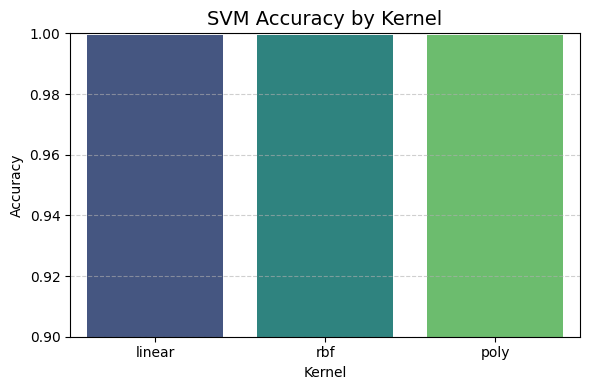

/tmp/ipython-input-7-2334975959.py:100: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


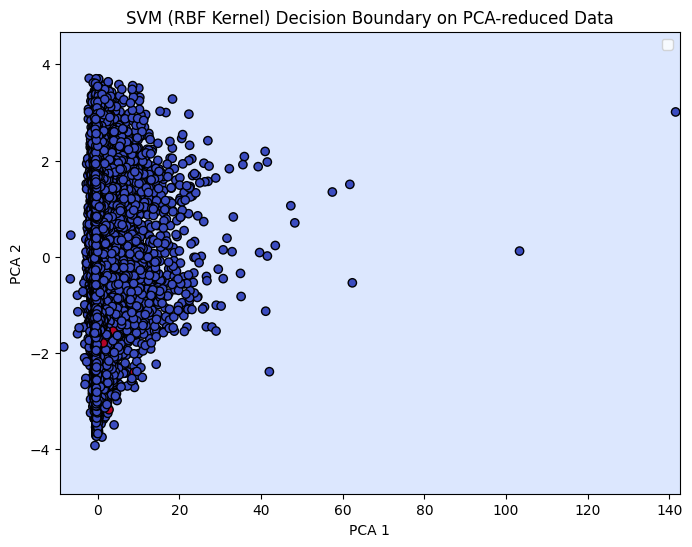

In [7]:
# SUPPORT VECTOR MACHINES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset

df = pd.read_csv("/content/creditcard.csv")

# Assume the dataset has a 'Class' column: 1 = fraud, 0 = normal
target_column = 'Class'

# Check for missing values before dropping rows
print("Missing values before dropping rows:")
print(df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

# Check for missing values after dropping rows
print("\nMissing values after dropping rows:")
print(df.isnull().sum())

# Check specifically for missing values in the target column after dropping rows
print(f"\nMissing values in '{target_column}' column after dropping rows:")
print(df[target_column].isnull().sum())


X = df.drop(target_column, axis=1)
y = df[target_column]

# 2. Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# 4. Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
accuracies = []

for kernel in kernels:
    print(f"\n Training SVM with {kernel} kernel...")
    svm = SVC(kernel=kernel, random_state=66)
    svm.fit(X_train_scaled, y_train)
    preds = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies.append((kernel, acc))

    # Show confusion matrix
    print(f"Accuracy ({kernel}): {acc:.4f}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

# 5. Accuracy comparison
results = pd.DataFrame(accuracies, columns=['Kernel', 'Accuracy'])
print("\n Accuracy Comparison:\n", results)

plt.figure(figsize=(6,4))
sns.barplot(x='Kernel', y='Accuracy', data=results, palette='viridis')
plt.title("SVM Accuracy by Kernel", fontsize=14)
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. 2D PCA visualization
# Fitting a simple SVM (e.g., RBF) for visualization
svm_viz = SVC(kernel='rbf', random_state=66)
svm_viz.fit(X_pca, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))

Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM (RBF Kernel) Decision Boundary on PCA-reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()